In [13]:
using QuantumOptics
using Plots
using LaTeXStrings

## Exact diagonalization of spin chain
Let's simulate the time evolution of the Néel ordered state
$$
    |\psi\rangle = |\downarrow\uparrow\downarrow\uparrow\cdots\rangle
$$
under the Hamiltonian
$$
    \mathcal{H} = -J \sum_{i=1}^{N-1} \mathbf{S}_i \cdot \mathbf{S}_{i+1}.
$$

In [44]:
N = 15
J = 1
b = SpinBasis(1//2);

In [45]:
sx = sigmax(b)
sy = sigmay(b)
sz = sigmaz(b);

Define a term in the Hamiltonian $\mathbf{S}_i \cdot \mathbf{S}_{i+1}$. We may be doing this a little inefficiently.

In [60]:
function Hterm(i, N)
    ids = [identityoperator(b) for k in 1:N]
    ids[i] = sx
    ids[i + 1] = sx
    H = tensor(ids...)
    ids[i] = sy
    ids[i + 1] = sy
    H += tensor(ids...)
    ids[i] = sz
    ids[i + 1] = sz
    H += tensor(ids...)
    return H
end

Hterm (generic function with 1 method)

Define some operators such as $S_z^{(i)}$:

In [61]:
function Sz(i, N)
    ids = [identityoperator(b) for k in 1:N]
    ids[i] = sz
    return tensor(ids...)
end

Sz (generic function with 1 method)

Add up all terms in the Hamiltonian.

In [62]:
H = Hterm(1, N)
for i in 2:(N - 1)
    H += Hterm(i, N)
end

Construct the initial state by starting with all spins pointing down, and flipping up the even ones.

In [63]:
ψ0_product = [spindown(b) for k in 1:N]
for i in 2:2:N
    ψ0_product[i] = spinup(b)
end
ψ0 = tensor(ψ0_product);

Run the simulation:

In [64]:
taxis = [0:0.01:10;]
tout, ψt = timeevolution.schroedinger(taxis, ψ0, H);

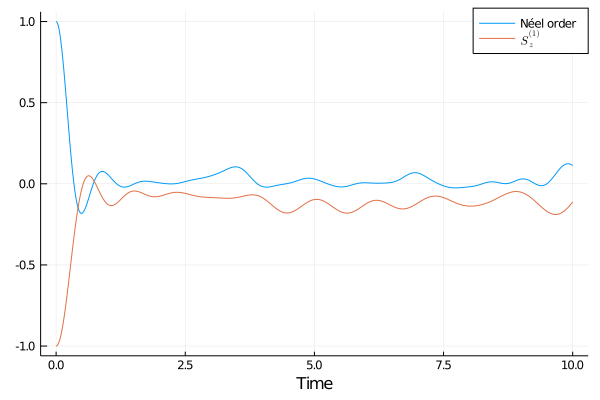

latex: failed to create a dvi file


In [65]:
Neel = sum([ (-1)^i * Sz(i, N) for i in 1:N ]) / N
neel_t = real(expect( Neel, ψt))
sz_t = real(expect( Sz(1, N), ψt ))
plot(tout, neel_t, label = "Néel order")
plot!(tout, sz_t, label = L"S_z^{(1)}")
xlabel!("Time")

In [67]:
io = open("ed-results.csv", "w")
for i in 1:length(tout)
    write(io, string(tout[i], ",", sz_t[i], ",", neel_t[i], "\n"))
end
close(io)